In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Prepare train data

### Letters as numpy arrays

In [28]:
A = np.array([[1,1,1,1,1],
             [1,-1,-1,-1,1],
             [1,-1,-1,-1,1],
             [1,1,1,1,1],
             [1,-1,-1,-1,1],
             [1,-1,-1,-1,1],
             [1,-1,-1,-1,1]])

C = np.array([[1,1,1,1,1],
             [1,-1,-1,-1,-1],
             [1,-1,-1,-1,-1],
             [1,-1,-1,-1,-1],
             [1,-1,-1,-1,-1],
             [1,-1,-1,-1,-1],
             [1,1,1,1,1]])

X = np.array([[-1,-1,-1,-1,-1],
             [1,-1,-1,-1,1],
             [-1,1,-1,1,-1],
             [-1,-1,1,-1,-1],
             [-1,1,-1,1,-1],
             [1,-1,-1,-1,1],
             [-1,-1,-1,-1,-1]])

Z = np.array([[1,1,1,1,1],
              [-1,-1,-1,-1,1],
             [-1,-1,-1,1,-1],
             [-1,-1,1,-1,-1],
             [-1,1,-1,-1,-1],
             [1,-1,-1,-1,-1],
             [1,1,1,1,1]
             ])

In [30]:
train_set = [A, C, X, Z]

<Figure size 864x864 with 0 Axes>

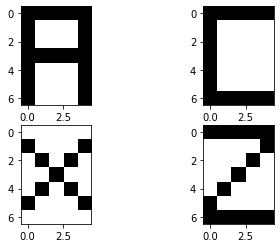

In [56]:
fig, ax = plt.subplots(2, 2)
for i, letter in enumerate(train_set):
    ax[i // 2, i % 2].imshow(-letter, 'gray')

### Add noise to images with letters

In [72]:
noise = np.random.choice([1, -1], (7, 5), p=[0.95, 0.05])

In [73]:
noise

array([[ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1],
       [-1,  1,  1,  1,  1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1,  1]])

<Figure size 864x864 with 0 Axes>

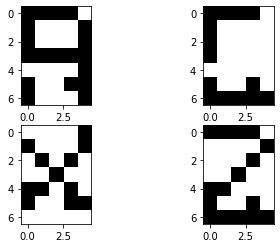

In [144]:
noised_letters = []
fig, ax = plt.subplots(2, 2)
for i, letter in enumerate(train_set):
    ax[i // 2, i % 2].imshow(-letter * noise, 'gray')
    noised_letters.append(letter * noise)

# Training

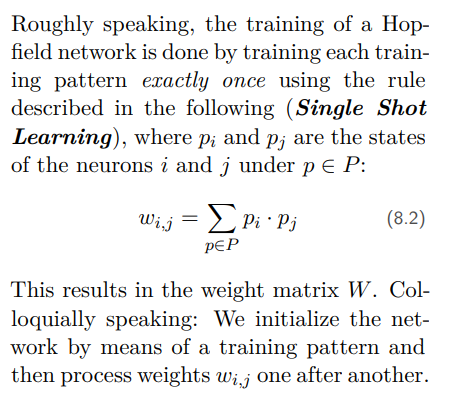

https://www.dkriesel.com/_media/science/neuronalenetze-en-zeta2-2col-dkrieselcom.pdf s.148

In [ ]:
weights = np.zeros((35, 35))

In [124]:
def weight_matrix_for_one_letter(mx):
    """:params mx: numpy array corresponding to image"""
    
    weights_ = np.dot(mx.reshape(35, 1), mx.reshape(1, 35))
    for i in range(35):
        weights_[i, i] = 0
        
    return weights_

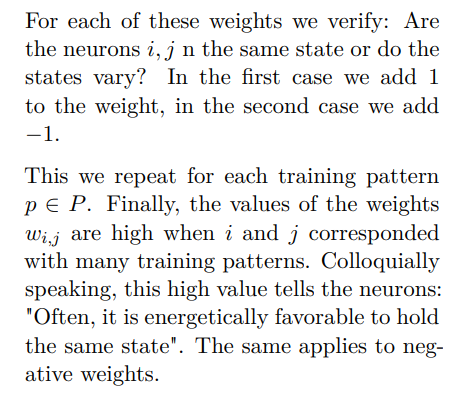

### Update weight matrix with each pattern (letter)

In [130]:
for letter in train_set:
    letter_wgh = weight_matrix_for_one_letter(letter)
    weights += letter_wgh

In [145]:
weights

array([[0., 4., 4., ..., 2., 2., 4.],
       [4., 0., 4., ..., 2., 2., 4.],
       [4., 4., 0., ..., 2., 2., 4.],
       ...,
       [2., 2., 2., ..., 0., 4., 2.],
       [2., 2., 2., ..., 4., 0., 2.],
       [4., 4., 4., ..., 2., 2., 0.]])

In [178]:
weights[weights > 0] = 1
weights[weights < 0] = -1
weights

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

# Predictions (denoising images)

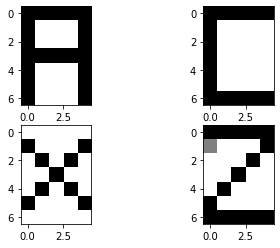

In [179]:
fig, ax = plt.subplots(2, 2)
for i, noised_letter in enumerate(noised_letters):
    denoised = np.dot(noised_letter.reshape(1, 35), weights)
    denoised[denoised > 0] = 1
    denoised[denoised < 0] = -1
    ax[i // 2, i % 2].imshow(-denoised.reshape(7,5), 'gray')